In [8]:
import pandas as pd

# Đọc dữ liệu

df = pd.read_excel("hotel_revenue_historical_full-2.xlsx", engine="openpyxl")

# Chuyển cột ngày thành dạng datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Tạo cột Năm
df['year'] = df['reservation_status_date'].dt.year

# Lọc các năm cần phân tích
df = df[df['year'].isin([2018, 2019, 2020])]

# Tính tỷ lệ hủy đặt phòng theo năm
cancel_rate = df.groupby('year')['is_canceled'].mean() * 100

print(cancel_rate)

print(df['year'].unique())



year
2018    37.160995
2019     0.000000
Name: is_canceled, dtype: float64
[2018 2019]


In [1]:
import pandas as pd

# Đường dẫn đến tệp Excel
excel_file = 'hotel_revenue_historical_full-2.xlsx'

# Đọc dữ liệu từ các sheet cần thiết
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')
df_market = pd.read_excel(excel_file, sheet_name='market_segment')
df_meal = pd.read_excel(excel_file, sheet_name='meal_cost')

print("Đã đọc xong dữ liệu từ tất cả các sheet.")
# Tính tỷ lệ hủy đặt phòng cho từng năm
cancellation_rate_2018 = (df_2018['is_canceled'].sum() / len(df_2018)) * 100
cancellation_rate_2019 = (df_2019['is_canceled'].sum() / len(df_2019)) * 100
cancellation_rate_2020 = (df_2020['is_canceled'].sum() / len(df_2020)) * 100

print(f"Tỷ lệ hủy đặt phòng năm 2018: {cancellation_rate_2018:.2f}%")
print(f"Tỷ lệ hủy đặt phòng năm 2019: {cancellation_rate_2019:.2f}%")
print(f"Tỷ lệ hủy đặt phòng năm 2020: {cancellation_rate_2020:.2f}%")

Đã đọc xong dữ liệu từ tất cả các sheet.
Tỷ lệ hủy đặt phòng năm 2018: 37.02%
Tỷ lệ hủy đặt phòng năm 2019: 36.53%
Tỷ lệ hủy đặt phòng năm 2020: 38.70%


In [6]:
import pandas as pd

# Load the datasets
df = pd.read_excel("hotel_revenue_historical_full-2.xlsx", engine="openpyxl")
# Combine the dataframes
combined_df = pd.concat([df_2018, df_2019, df_2020])

# Calculate cancellation rates for each year
cancellation_rate_2018 = (df_2018['is_canceled'].sum() / len(df_2018)) * 100
cancellation_rate_2019 = (df_2019['is_canceled'].sum() / len(df_2019)) * 100
cancellation_rate_2020 = (df_2020['is_canceled'].sum() / len(df_2020)) * 100

# Print the results
print(f"Tỷ lệ hủy đặt phòng năm 2018: {cancellation_rate_2018:.2f}%")
print(f"Tỷ lệ hủy đặt phòng năm 2019: {cancellation_rate_2019:.2f}%")
print(f"Tỷ lệ hủy đặt phòng năm 2020: {cancellation_rate_2020:.2f}%")

Tỷ lệ hủy đặt phòng năm 2018: 37.02%
Tỷ lệ hủy đặt phòng năm 2019: 36.53%
Tỷ lệ hủy đặt phòng năm 2020: 38.70%


In [7]:
#lab2
import pandas as pd

# Load the datasets
df = pd.read_excel("hotel_revenue_historical_full-2.xlsx", engine="openpyxl")

# Calculate average ADR for each hotel type in 2018
adr_2018 = df_2018.groupby('hotel')['adr'].mean().reset_index()
print("ADR trung bình năm 2018:")
print(adr_2018)
print("-" * 30)

# Calculate average ADR for each hotel type in 2019
adr_2019 = df_2019.groupby('hotel')['adr'].mean().reset_index()
print("ADR trung bình năm 2019:")
print(adr_2019)
print("-" * 30)

# Calculate average ADR for each hotel type in 2020
adr_2020 = df_2020.groupby('hotel')['adr'].mean().reset_index()
print("ADR trung bình năm 2020:")
print(adr_2020)
print("-" * 30)

ADR trung bình năm 2018:
          hotel        adr
0    City Hotel  85.856915
1  Resort Hotel  89.353417
------------------------------
ADR trung bình năm 2019:
          hotel        adr
0    City Hotel  98.820446
1  Resort Hotel  87.748687
------------------------------
ADR trung bình năm 2020:
          hotel         adr
0    City Hotel  117.501864
1  Resort Hotel  108.660217
------------------------------


In [ ]:
import pandas as pd

# Load and combine all datasets for a comprehensive analysis
df = pd.read_excel("hotel_revenue_historical_full-2.xlsx", engine="openpyxl")

# Kết hợp tất cả 3 dataframe thành một dataframe duy nhất
# ignore_index=True sẽ giúp đánh số lại chỉ mục (index) của các hàng
combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# Nhóm dữ liệu theo cột 'is_canceled' (bị hủy hay không)
# Sau đó tính giá trị trung bình (mean) của cột 'lead_time' cho mỗi nhóm
lead_time_by_cancellation = combined_df.groupby('is_canceled')['lead_time'].mean()

# Đổi tên chỉ mục (index) để dễ đọc hơn trong kết quả in ra
# 0: 'Booking không bị hủy'
# 1: 'Booking bị hủy'
lead_time_by_cancellation = lead_time_by_cancellation.rename(index={0: 'Booking không bị hủy', 1: 'Booking bị hủy'})

# Print the results
print("Lead time trung bình theo trạng thái hủy:")
print(lead_time_by_cancellation)

Lead time trung bình theo trạng thái hủy:
is_canceled
Booking không bị hủy     76.892647
Booking bị hủy          146.547001
Name: lead_time, dtype: float64


lead_time của các booking bị hủy cao hơn điều đó chứng tỏ những người đặt phòng sớm có khả năng hủy cao hơn.

In [12]:
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. Tải và kết hợp các sheet từ file Excel
# sheet_name='2018' sẽ chỉ đọc sheet có tên là "2018"
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

# Kết hợp tất cả 3 dataframe thành một dataframe duy nhất
combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 2. Tải sheet 'market_segment' và ghép vào dữ liệu chính
df_market_segment = pd.read_excel(excel_file, sheet_name='market_segment')

# Ghép dữ liệu chính với df_market_segment dựa trên cột 'market_segment'
combined_df = pd.merge(combined_df, df_market_segment, on='market_segment', how='left')

# 3. Tính toán cột doanh thu
# Đầu tiên, tạo cột total_nights = stays_in_weekend_nights + stays_in_week_nights
combined_df['total_nights'] = combined_df['stays_in_weekend_nights'] + combined_df['stays_in_week_nights']

# Tiếp theo, tính doanh thu cho mỗi booking
combined_df['revenue'] = combined_df['adr'] * combined_df['total_nights'] * (1 - combined_df['Discount'])

# 4. Tính doanh thu trung bình cho từng kênh bán hàng
# Nhóm dữ liệu theo 'market_segment' và tính trung bình của cột 'revenue'
average_revenue_by_market = combined_df.groupby('market_segment')['revenue'].mean().reset_index()

# Sắp xếp kết quả theo thứ tự doanh thu giảm dần để dễ so sánh
average_revenue_by_market = average_revenue_by_market.sort_values(by='revenue', ascending=False)

# 5. In kết quả
print("Doanh thu trung bình theo từng kênh bán hàng:")
print(average_revenue_by_market)

Doanh thu trung bình theo từng kênh bán hàng:
  market_segment     revenue
3         Direct  365.404751
0       Aviation  295.177586
6      Online TA  294.739007
5  Offline TA/TO  231.397741
4         Groups  207.921811
2      Corporate  126.720774
7      Undefined   24.000000
1  Complementary    0.000000


In [13]:
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 2. Tải sheet 'meal_cost' và ghép vào dữ liệu chính
df_meal_cost = pd.read_excel(excel_file, sheet_name='meal_cost')

# Ghép dữ liệu chính với df_meal_cost dựa trên cột 'meal'
combined_df = pd.merge(combined_df, df_meal_cost, on='meal', how='left')

# 3. Tính toán chi phí ăn uống trung bình cho từng loại meal
# Nhóm dữ liệu theo cột 'meal' và tính trung bình của cột 'Cost'
average_meal_cost = combined_df.groupby('meal')['Cost'].mean().reset_index()

# 4. Đếm số lần booking của mỗi loại meal để xem loại nào phổ biến nhất
# Sử dụng value_counts() để đếm số lần xuất hiện của mỗi giá trị trong cột 'meal'
most_popular_meal = combined_df['meal'].value_counts().reset_index()
most_popular_meal.columns = ['meal', 'count']

# 5. In kết quả
print("Chi phí ăn uống trung bình theo từng loại bữa ăn:")
print(average_meal_cost)
print("-" * 50)

print("Số lượng booking cho từng loại bữa ăn:")
print(most_popular_meal)

Chi phí ăn uống trung bình theo từng loại bữa ăn:
        meal   Cost
0         BB  12.99
1         FB  21.99
2         HB  17.99
3         SC  35.00
4  Undefined   0.00
--------------------------------------------------
Số lượng booking cho từng loại bữa ăn:
        meal   count
0         BB  109878
1         HB   18402
2         SC   11067
3  Undefined    1372
4         FB    1228


In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 5.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.1 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 4.8 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 4.8 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 3.5 MB/s eta 0:00:01
   ---------------------


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


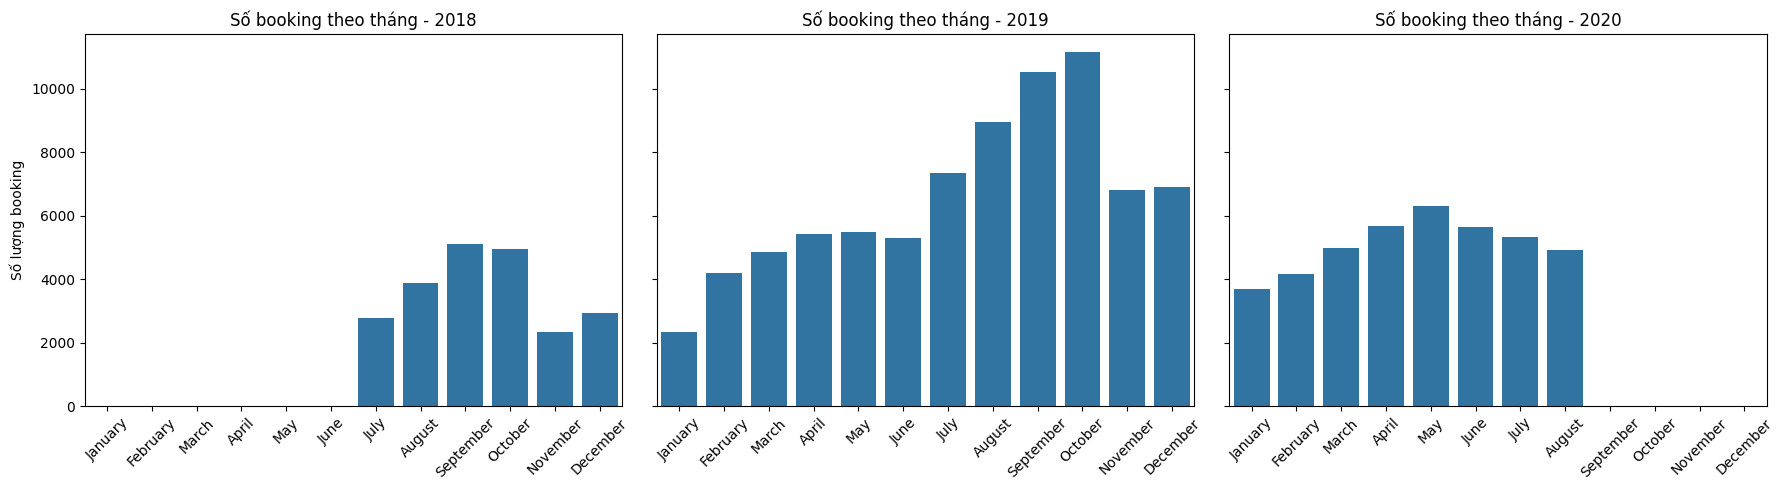

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# Tải dữ liệu cho từng năm
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

# Sắp xếp thứ tự các tháng để biểu đồ hiển thị chính xác
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Tạo một hình vẽ (figure) và các trục (axes) để chứa các biểu đồ con
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Biểu đồ cho năm 2018
sns.countplot(x='arrival_date_month', data=df_2018, order=month_order, ax=axes[0])
axes[0].set_title('Số booking theo tháng - 2018')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Số lượng booking')

# Biểu đồ cho năm 2019
sns.countplot(x='arrival_date_month', data=df_2019, order=month_order, ax=axes[1])
axes[1].set_title('Số booking theo tháng - 2019')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Biểu đồ cho năm 2020
sns.countplot(x='arrival_date_month', data=df_2020, order=month_order, ax=axes[2])
axes[2].set_title('Số booking theo tháng - 2020')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('')
axes[2].set_ylabel('')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# Đếm số lượng giá trị thiếu (NaN) trong mỗi cột
missing_values = combined_df.isnull().sum()

# In kết quả
print("Số lượng giá trị bị thiếu (NaN) trong từng cột:")
print(missing_values[missing_values > 0]) # Chỉ in các cột có giá trị thiếu

Số lượng giá trị bị thiếu (NaN) trong từng cột:
children         8
country        625
agent        19555
company     133822
dtype: int64


In [4]:
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')
combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 1. Chuyển đổi tên tháng sang số
# Tạo một từ điển để ánh xạ tên tháng sang số
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
              'May': 5, 'June': 6, 'July': 7, 'August': 8,
              'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Áp dụng từ điển để chuyển đổi cột tháng
combined_df['arrival_date_month'] = combined_df['arrival_date_month'].map(month_dict)

# 2. Ghép các cột ngày tháng thành một chuỗi
combined_df['arrival_date'] = (
    combined_df['arrival_date_year'].astype(str) + '-' +
    combined_df['arrival_date_month'].astype(str) + '-' +
    combined_df['arrival_date_day_of_month'].astype(str)
)

# 3. Chuyển đổi cột mới sang định dạng datetime
# errors='coerce' sẽ biến các giá trị không hợp lệ (ví dụ: ngày 31 tháng 2) thành NaT (Not a Time)
combined_df['arrival_date'] = pd.to_datetime(combined_df['arrival_date'], errors='coerce')

# 4. Kiểm tra các giá trị ngày tháng không hợp lệ
# Đếm số lượng giá trị NaT sau khi chuyển đổi
invalid_dates_count = combined_df['arrival_date'].isnull().sum()
print(f"Tổng số booking có ngày tháng không hợp lệ: {invalid_dates_count}")

# Bạn cũng có thể xem các hàng có ngày tháng không hợp lệ
# print(combined_df[combined_df['arrival_date'].isnull()])

# 5. Kiểm tra kết quả
print("\nThông tin về cột 'arrival_date' sau khi chuyển đổi:")
print(combined_df[['arrival_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head())


Tổng số booking có ngày tháng không hợp lệ: 0

Thông tin về cột 'arrival_date' sau khi chuyển đổi:
  arrival_date  arrival_date_year  arrival_date_month  \
0   2018-07-01               2018                   7   
1   2018-07-01               2018                   7   
2   2018-07-01               2018                   7   
3   2018-07-01               2018                   7   
4   2018-07-01               2018                   7   

   arrival_date_day_of_month  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  


In [5]:
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 1. Tạo cột 'total_nights'
combined_df['total_nights'] = combined_df['stays_in_weekend_nights'] + combined_df['stays_in_week_nights']

# 2. Đếm số booking có 'total_nights' = 0
zero_nights_bookings_count = combined_df[combined_df['total_nights'] == 0].shape[0]

# 3. In kết quả
print(f"Tổng số booking có tổng số đêm ở bằng 0: {zero_nights_bookings_count}")

# 4. Phân tích các booking này
zero_nights_bookings = combined_df[combined_df['total_nights'] == 0]
print("\nMột vài ví dụ về các booking có tổng số đêm ở bằng 0:")
print(zero_nights_bookings.head())

Tổng số booking có tổng số đêm ở bằng 0: 871

Một vài ví dụ về các booking có tổng số đêm ở bằng 0:
             hotel  is_canceled  lead_time  arrival_date_year  \
7951  Resort Hotel            0        342               2018   
7952  Resort Hotel            0        737               2018   
8082  Resort Hotel            0        111               2018   
8083  Resort Hotel            0          0               2018   
8107  Resort Hotel            0          8               2018   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
7951               July                        27                          1   
7952               July                        27                          1   
8082               July                        28                          6   
8083               July                        28                          6   
8107               July                        28                          7   

      stays_in_weekend_night

In [6]:
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 2. Phân tích tỷ lệ hủy đặt phòng
# Nhóm dữ liệu theo cột 'is_repeated_guest' và tính trung bình của cột 'is_canceled'
# Giá trị trung bình của cột is_canceled (0 hoặc 1) chính là tỷ lệ hủy
cancellation_rate_by_guest = combined_df.groupby('is_repeated_guest')['is_canceled'].mean() * 100
print("Tỷ lệ hủy đặt phòng theo loại khách hàng:")
print(cancellation_rate_by_guest.rename(index={0: 'Khách hàng mới', 1: 'Khách hàng quay lại'}))

print("-" * 50)

# 3. Phân tích ADR trung bình
# Nhóm dữ liệu theo cột 'is_repeated_guest' và tính trung bình của cột 'adr'
adr_by_guest = combined_df.groupby('is_repeated_guest')['adr'].mean()
print("ADR trung bình theo loại khách hàng:")
print(adr_by_guest.rename(index={0: 'Khách hàng mới', 1: 'Khách hàng quay lại'}))

Tỷ lệ hủy đặt phòng theo loại khách hàng:
is_repeated_guest
Khách hàng mới         37.771555
Khách hàng quay lại    20.327942
Name: is_canceled, dtype: float64
--------------------------------------------------
ADR trung bình theo loại khách hàng:
is_repeated_guest
Khách hàng mới         100.554611
Khách hàng quay lại     64.280499
Name: adr, dtype: float64


In [7]:
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 2. Chuẩn hóa dữ liệu: Thay thế giá trị "Undefined" bằng "Other"
# Sử dụng phương thức .replace() để thay đổi giá trị trong các cột
combined_df['meal'] = combined_df['meal'].replace("Undefined", "Other")
combined_df['market_segment'] = combined_df['market_segment'].replace("Undefined", "Other")

# 3. Kiểm tra kết quả sau khi thay thế
print("Số lượng giá trị của cột 'meal' sau khi chuẩn hóa:")
print(combined_df['meal'].value_counts())

print("\n" + "-" * 50 + "\n")

print("Số lượng giá trị của cột 'market_segment' sau khi chuẩn hóa:")
print(combined_df['market_segment'].value_counts())

Số lượng giá trị của cột 'meal' sau khi chuẩn hóa:
meal
BB       109878
HB        18402
SC        11067
Other      1372
FB         1228
Name: count, dtype: int64

--------------------------------------------------

Số lượng giá trị của cột 'market_segment' sau khi chuẩn hóa:
market_segment
Online TA        62840
Offline TA/TO    30379
Groups           26115
Direct           14973
Corporate         6486
Complementary      913
Aviation           237
Other                4
Name: count, dtype: int64
